In [ ]:
# Pandata Technical Challenge 1
# Anand Lal-Tabak 6-12-19 3PM EST

In [4]:
'''
CODEBOOK:
Columns
country: The country that the wine is from
description: A few sentences from a sommelier describing the wine's taste, smell, look, feel, etc.
designation: The vineyard within the winery where the grapes that made the wine are from
points: The number of points WineEnthusiast rated the wine on a scale of 1-100 (though they say they only post reviews for wines that score >=80)
price: The cost for a bottle of the wine
province: The province or state that the wine is from
region_1: The wine growing area in a province or state (ie Napa)
region_2: Sometimes there are more specific regions specified within a wine growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank
taster_name: Name of the person who tasted and reviewed the wine
taster_twitter_handle: Twitter handle for the person who tasted and reviewed the wine
title: The title of the wine review, which often contains the vintage if you're interested in extracting that feature
variety: The type of grapes used to make the wine (ie Pinot Noir)
winery: The winery that made the wine

Citation: https://www.kaggle.com/zynicide/wine-reviews

'''

SyntaxError: invalid syntax (<ipython-input-4-cb6ddb86badf>, line 1)

In [154]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18

import seaborn as sns 
palette = sns.color_palette('Paired', 10)

In [5]:
data = pd.read_csv('/Users/Anand/Desktop/Pandata Data Analyst Challenge/winemag_data_pandata.csv')

In [6]:
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,nan,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.000,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [7]:
data.describe()

,Unnamed: 0,points,price
count,129971.000,129971.000,120975.000
mean,64985.000,88.447,33.861
std,37519.540,3.040,42.271
min,0.000,80.000,-24.000
25%,32492.500,86.000,16.000
50%,64985.000,88.000,25.000
75%,97477.500,91.000,42.000
max,129970.000,100.000,3300.000


In [ ]:
# as stated in codebook, only wines of 80 or
# higher in point score are included in the dataset.

In [66]:
number_of_reviews_by_country = data['country'].value_counts()
number_of_reviews_by_country.describe

<bound method NDFrame.describe of US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukrain

In [43]:
print(data['country'].value_counts() >1000)

US                         True
France                     True
Italy                      True
Spain                      True
Portugal                   True
Chile                      True
Argentina                  True
Austria                    True
Australia                  True
Germany                    True
New Zealand                True
South Africa               True
Israel                    False
Greece                    False
Canada                    False
Hungary                   False
Bulgaria                  False
Romania                   False
Uruguay                   False
Turkey                    False
Slovenia                  False
Georgia                   False
England                   False
Croatia                   False
Mexico                    False
Moldova                   False
Brazil                    False
Lebanon                   False
Morocco                   False
Peru                      False
Ukraine                   False
Czech Re

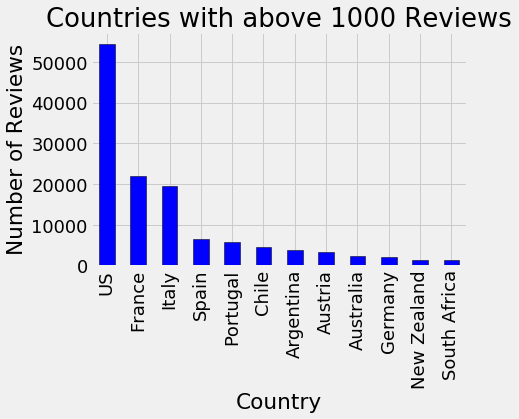

In [74]:
data['country'].value_counts().head(12).plot.bar(color = 'b', edgecolor ='k');
plt.ylabel('Number of Reviews'); plt.xlabel('Country'); plt.title('Countries with above 1000 Reviews');

TypeError: 'Text' object is not callable

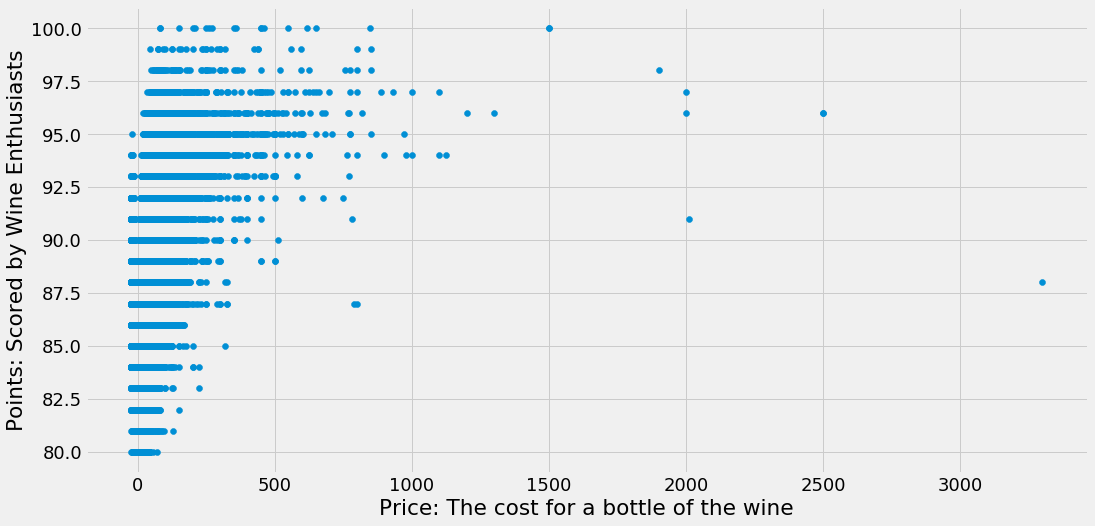

In [85]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['price'], data['points'])
ax.set_xlabel('Price: The cost for a bottle of the wine')
ax.set_ylabel('Points: Scored by Wine Enthusiasts')
ax.title('Scatter of Points by Price')
plt.show()

In [116]:
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [158]:
data = data.dropna(subset=['price'], how='all')
data = data.dropna(subset=['points'], how='all')
data = data[["price", "points"]]
data.head()

,price,points
1,15.000,87
2,14.000,87
3,13.000,87
4,65.000,87
5,15.000,87


In [159]:
predict = "points"
#X = dependent variable = price
X = np.array(data.drop([predict], 1))

#Y = independent variable = points
Y = np.array(data[predict])

In [160]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split (X, Y, test_size = 0.0)
#using 10% of data to train for regression.
lr = linear_model.LinearRegression()

lr.fit(x_train, y_train)

print(
    'Intercept:', round(lr.intercept_, 4),
    'Coefficient:', round(lr.coef_[0], 4))

Intercept: 87.3981 Coefficient: 0.0302


In [161]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split (X, Y, test_size = 0.1)
#using 10% of data to train for regression.
lr = linear_model.LinearRegression()

lr.fit(x_train, y_train)

print(
    'Intercept:', round(lr.intercept_, 4),
    'Coefficient:', round(lr.coef_[0], 4))

Intercept: 87.4162 Coefficient: 0.0296


In [162]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split (X, Y, test_size = 0.4)
#using 10% of data to train for regression.
lr = linear_model.LinearRegression()

lr.fit(x_train, y_train)

print(
    'Intercept:', round(lr.intercept_, 4),
    'Coefficient:', round(lr.coef_[0], 4))

Intercept: 87.4183 Coefficient: 0.0295


In [139]:
import statsmodels.formula.api as sm


In [163]:
model = sm.ols(formula='points ~ price', data=data)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                 2.588e+04
Date:                Wed, 12 Jun 2019   Prob (F-statistic):               0.00
Time:                        17:13:19   Log-Likelihood:            -2.9461e+05
No. Observations:              120975   AIC:                         5.892e+05
Df Residuals:                  120973   BIC:                         5.893e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     87.3981      0.010   8585.911      0.000      87.378      87.418
price          0.0302      0.000    160.878      0.000       0.030       0.031
==============================================================================
Omnibus:                    48720.060   Durbin-Watson:                   0.377
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3022722.425
Skew:                          -1.123   Prob(JB):                         0.00
Kurtosis:                      27.385   Cond. No.                         69.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [172]:
ln_Price = np.log(X)
print(ln_Price)

[[2.7080502 ]
 [2.63905733]
 [2.56494936]
 ...
 [3.40119738]
 [3.4657359 ]
 [3.04452244]]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


In [173]:
model = sm.ols(formula='points ~ ln_Price', data=data)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                 6.853e+04
Date:                Wed, 12 Jun 2019   Prob (F-statistic):               0.00
Time:                        17:16:48   Log-Likelihood:            -2.6561e+05
No. Observations:              115428   AIC:                         5.312e+05
Df Residuals:                  115426   BIC:                         5.312e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     78.9990      0.037   2136.243      0.000      78.927      79.072
ln_Price       2.8431      0.011    261.782      0.000       2.822       2.864
==============================================================================
Omnibus:                     2373.480   Durbin-Watson:                   0.746
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2528.165
Skew:                          -0.353   Prob(JB):                         0.00
Kurtosis:                       3.166   Cond. No.                         19.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
'''

Both models are significant at the >1% level.  The Linear Regression
implies that a 1 unit increase in price leads to a 0.0302 increase in
point score for a wine bottle.  The linear-log model implies that a 1%
increase in price leads to a 2.8431 increase in point score for a wine
bottle.  The R^2 and Adjusted R^2 are higher (.37) for the linear-log
model, as opposed to 0.17 in the linear regression.  This is however
not a good enough reason to assume that the model is a better fit.

It is clear from both models that an increase in price leads to an 
increased points score.  The fact that both models have the same sign
for this provides support for the hypothesis that "better wine is more
expensive".

Looking at the residual plots (estimated in STATA but did not have time
to compute in Python as less familiar with programming in Python), the
linear-log model is centered around 0.  This is in stark contrast to the 
linear regression residual plot which is skewed negative and toward
the 0 values of price.  

While this suggests that the linear-log model should be preferred, 
further tests should be conducted to verify that its accuracy holds.

'''